In [1]:
#Imports 

import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F

In [2]:
#Loading the training and test data

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#Download and load the testing data
valset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [3]:
#Defining the ML model

#The following is a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [4]:
# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.2958, grad_fn=<NllLossBackward>)


In [5]:

x = torch.randn(2,2, requires_grad=True)
print(x)
y = x**2
print(y)


tensor([[-0.6424, -0.9220],
        [-1.3359, -1.4522]], requires_grad=True)
tensor([[0.4127, 0.8501],
        [1.7847, 2.1089]], grad_fn=<PowBackward0>)


In [6]:

## grad_fn shows the function that generated this variable
print(y.grad_fn)

z = y.mean()
print(z)

z.backward()
print(x.grad)
print(x/2)

print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)


tensor(1.2891, grad_fn=<MeanBackward0>)
tensor([[-0.3212, -0.4610],
        [-0.6680, -0.7261]])
tensor([[-0.3212, -0.4610],
        [-0.6680, -0.7261]], grad_fn=<DivBackward0>)
Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0040, -0.0040, -0.0040,  ..., -0.0040, -0.0040, -0.0040],
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        ...,
        [ 0.0037,  0.0037,  0.0037,  ...,  0.0037,  0.0037,  0.0037],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015]])


In [7]:

#TRAINING THE MODEL (using pytorch's optim package. For example we can use stochastic gradient descent with optim.SGD)

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[ 0.0035,  0.0270,  0.0229,  ..., -0.0095, -0.0067,  0.0350],
        [ 0.0051,  0.0339,  0.0253,  ...,  0.0284,  0.0196, -0.0317],
        [ 0.0096, -0.0027, -0.0205,  ...,  0.0025,  0.0115,  0.0127],
        ...,
        [-0.0032,  0.0348, -0.0302,  ..., -0.0339,  0.0119,  0.0105],
        [-0.0222,  0.0038, -0.0149,  ..., -0.0027, -0.0134,  0.0126],
        [-0.0178,  0.0009,  0.0144,  ...,  0.0271, -0.0045,  0.0028]],
       requires_grad=True)
Gradient - tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        ...,
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013]])
Updated weights -  Parameter containing:
tensor([[ 0.

In [9]:
#TRAINING FOR REAL (Now we'll put this algorithm into a loop so we can go through all the images.
# For each batch, we'll doing a training pass where we calculate the loss, do a backwards pass, and update the weights.)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        #TODO: Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss / len(trainloader)}")

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

Training loss: 0.35365282442333346
Training loss: 0.33616056063694993
Training loss: 0.32315398997335293
Training loss: 0.31302414152191393
Training loss: 0.30369639862924497


In [12]:
#Viewing the image

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()     #Note, in pycharm you need to add plt.show() to view results.
    

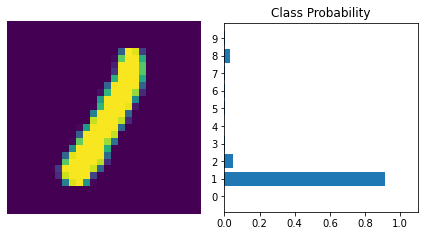

In [13]:
view_classify(img.view(1, 28, 28), ps)


In [14]:
#Determining Accuracy of Model

correct_count, all_count = 0, 0
for images, labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if (true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count / all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9155
